In [20]:
import utils 
import transformer 
import bar_distribution
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import prior 
matplotlib.use('TkAgg')
%matplotlib inline
import main
import importlib
device = torch.device("cuda")
importlib.reload(utils)
importlib.reload(transformer)
importlib.reload(bar_distribution)
importlib.reload(main)
importlib.reload(prior)
import random
from sklearn.cluster import KMeans
#####################################################################################################################################################
import warnings 
warnings.filterwarnings("ignore")

In [21]:
print(f"Using device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
device = torch.device("cuda")
d_model, nhead, nhid, nlayers = 256, 4, 512, 4
lr = 0.001
num_outputs = 5
batch_size = 100
in_features = 2
noise = False
model = transformer.Transformer(d_model, nhead, nhid, nlayers, in_features=in_features,buckets_size=num_outputs).to(device)
print(f"total params:{sum(p.numel() for p in model.parameters())}")
criterion = nn.CrossEntropyLoss()
model.criterion = criterion

Using device: Quadro P1000
total params:2111493


In [22]:
model.load_state_dict(torch.load("C:\\Users\\prajb\\OneDrive\\Documents\\TU Delft CSE Masters Y2\\Thesis Projects\\PFN clustering\\saved_model8000.pt", weights_only=True))
model.eval() 

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0, inplace=False)
        (dropout2): Dropout(p=0, inplace=False)
      )
    )
    (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): Linear(in_features=256, out_features=5, bias=True)
  (linear_x): Sequential(
    (0): Normalize()
    (1): Linear(in_features=2, out_features=256, bias=True)
  )
  (linear_y): Linear(in_features=1, out_feature

In [23]:
%matplotlib inline
temp_batch_size = 10
std_variation = True
random_seed = 42
train_X, train_Y, y_target_noisy, batch_classes = prior.sample_clusters(batch_size=temp_batch_size,num_classes=num_outputs, kmeans=True,std_variation = std_variation) 
print(len(train_X))

157


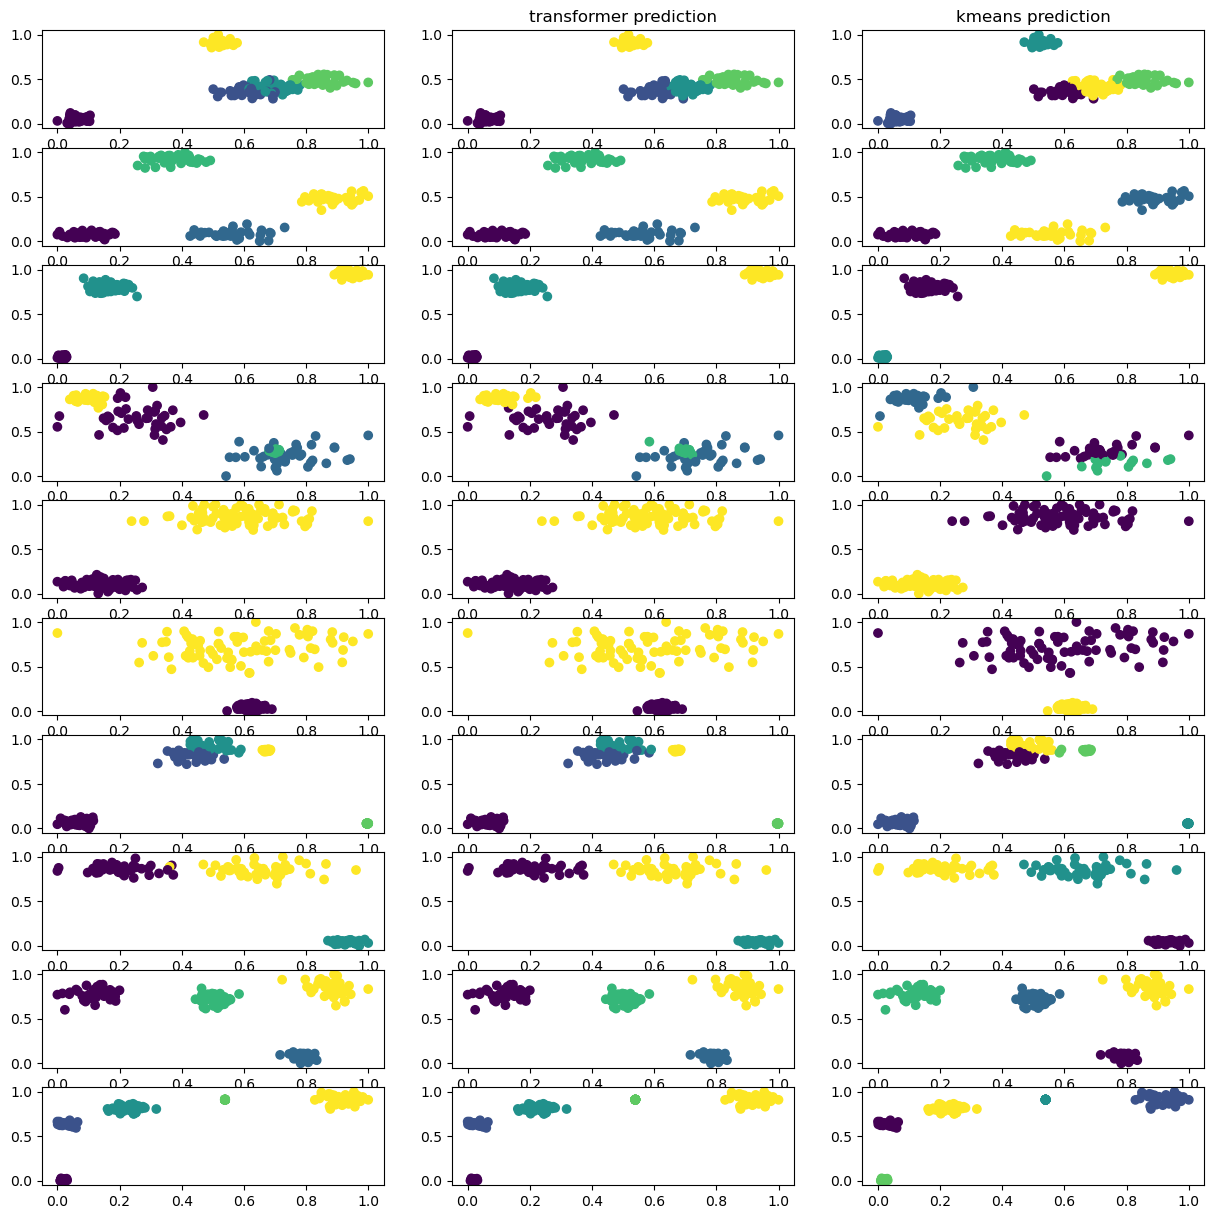

In [24]:
# # Set up grid for subplots
fig, axes = plt.subplots(temp_batch_size, 3, figsize=(15, 15)) 
axes = axes.flatten() 
for batch_index in range(temp_batch_size):
    train_x = train_X[:, batch_index]
    train_y = train_Y[:, batch_index] 
    train_x = train_x.to(next(model.parameters()).device)
    axes[3 * batch_index].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=train_y.cpu().numpy())
    logits = model(train_x)
    k_labels = utils.k_means(train_x, batch_classes[batch_index])
    predictions = torch.argmax(logits, dim=1)
    axes[3 * batch_index +1].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=predictions.cpu().numpy())
    axes[3 * batch_index +2].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=k_labels)
axes[1].set_title(f"transformer prediction")
axes[2].set_title(f"kmeans prediction")
plt.show()

In [8]:
accuracy_buckets = utils.compute_accuracy_metric(model=model,batch_size=500, num_features=in_features, num_classes=num_outputs) 

In [9]:
accuracy_buckets

array([  0.,   0.,   0.,   0.,   1.,   7.,   9.,   1.,  11.,  95., 376.])

In [10]:
%matplotlib inline
def plot_accuracy_metric(accuracy_buckets):
    buckets = [f"{i * 10}-{(i + 1) * 10 -1}%" for i in range(10)] 
    buckets.append("100%")
    plt.figure(figsize=(8, 5))
    plt.bar(buckets, accuracy_buckets, color='skyblue', edgecolor='black')
    plt.xlabel("Accuracy Ranges (%)")
    plt.ylabel("Frequency")
    plt.title("Accuracy Distribution Across Buckets")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
#plot_accuracy_metric(accuracy_buckets)

In [11]:
train_X, train_Y, y_target_noisy, batch_classes = prior.sample_clusters2(10, batch_size=1,num_classes=2, kmeans=True,std_variation = std_variation)

train_X2, train_Y2, y_target_noisy2, batch_classes = prior.sample_clusters2(10, batch_size=1,num_classes=2, kmeans=True,std_variation = std_variation) 

In [51]:
print(train_X)
print('------------')
print(train_X2)

tensor([[[1., 1.]],

        [[0., 0.]]], device='cuda:0')
------------
tensor([[[0., 0.]],

        [[1., 1.]]], device='cuda:0')


In [22]:
assert torch.allclose(train_X, train_X2, atol=1e-6), "Tensors are not approximately equal"

assert torch.equal(train_X, train_X2), "Tensors are not exactly equal"

AssertionError: Tensors are not approximately equal

In [12]:
print(f"Using device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
device = torch.device("cuda")
d_model, nhead, nhid, nlayers = 256, 4, 512, 4
lr = 0.001
num_outputs = 10
batch_size = 100
in_features = 5
noise = False
model = transformer.Transformer(d_model, nhead, nhid, nlayers, in_features=in_features,buckets_size=num_outputs).to(device)
print(f"total params:{sum(p.numel() for p in model.parameters())}")
criterion = nn.CrossEntropyLoss()
model.criterion = criterion

Using device: Quadro P1000
total params:2113546


In [13]:
model.load_state_dict(torch.load("C:\\Users\\prajb\\OneDrive\\Documents\\TU Delft CSE Masters Y2\\Thesis Projects\\PFN clustering\\saved_model_five_features.pt", weights_only=True))
model.eval() 

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0, inplace=False)
        (dropout2): Dropout(p=0, inplace=False)
      )
    )
    (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): Linear(in_features=256, out_features=10, bias=True)
  (linear_x): Sequential(
    (0): Normalize()
    (1): Linear(in_features=5, out_features=256, bias=True)
  )
  (linear_y): Linear(in_features=1, out_featur

In [14]:
accuracy_buckets = utils.compute_accuracy_metric(model=model,batch_size=500, num_features=in_features, num_classes=num_outputs)
accuracy_buckets

array([  0.,   0.,   1.,   0.,   0.,   1.,  11.,  18.,  33.,  82., 354.])

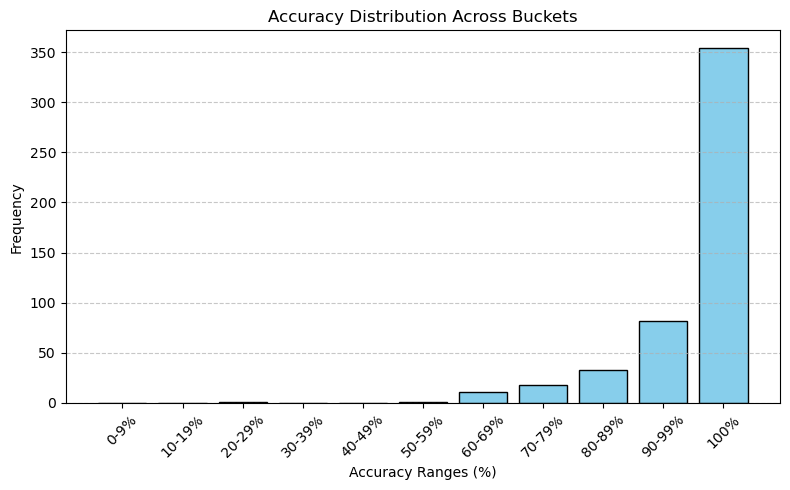

In [15]:
plot_accuracy_metric(accuracy_buckets)

In [16]:
accuracy_buckets, accuracy_buckets_gmm, accuracy_buckets_kmeans = utils.compute_accuracy_metric2(model=model,batch_size=1000, num_features=in_features, num_classes=4)
print(accuracy_buckets) 
print(accuracy_buckets_gmm) 
print(accuracy_buckets_kmeans) 

[  0.   0.   0.   0.   0.   0.   3.   2.   6.  72. 917.]
[  0.   0.   0.   0.   0.   1.   2.   0.   0.   0. 997.]
[  0.   0.   0.   0.   0.   0.   1.   0.   0.   2. 997.]


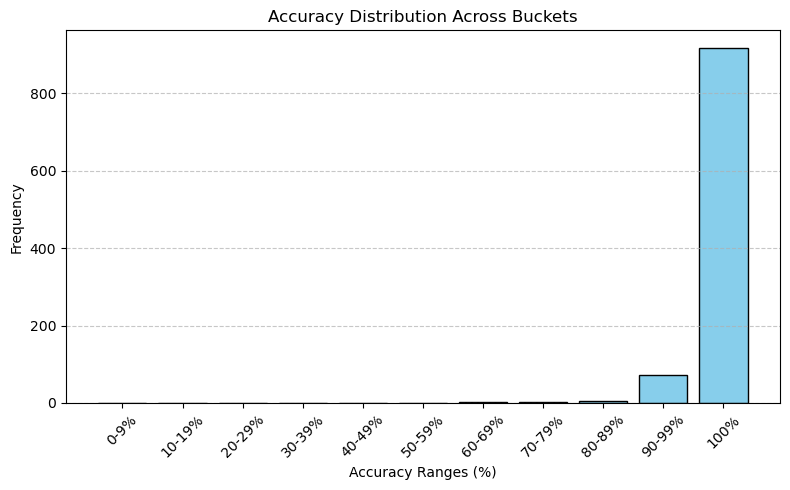

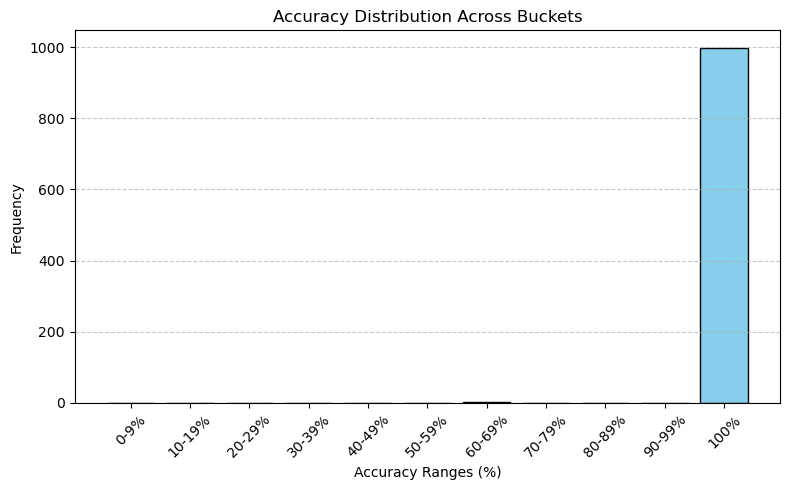

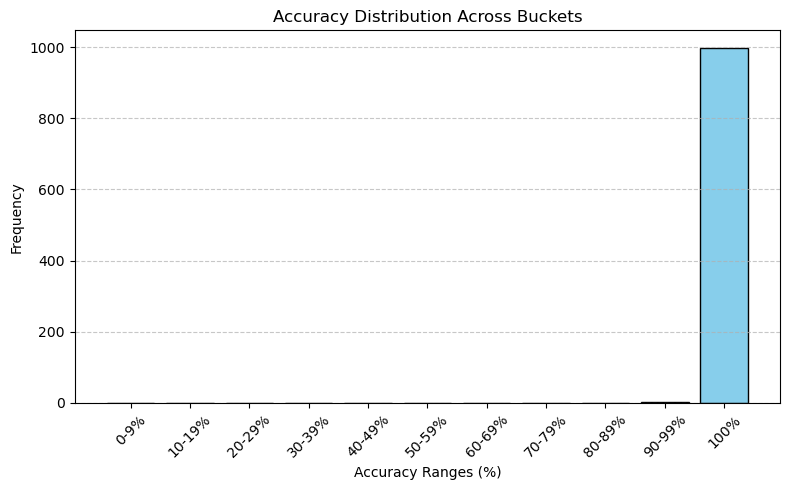

In [17]:
plot_accuracy_metric(accuracy_buckets)
plot_accuracy_metric(accuracy_buckets_gmm)
plot_accuracy_metric(accuracy_buckets_kmeans)

In [18]:
utils.predict_num_classes(model=model,batch_size=1000, num_features=in_features, num_classes=10, exact=False)

'Proportion of classes predicted correctly: Transformer: 0.95, BGM: 0.77'